In [1]:
import keras
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.layers import Dropout

In [2]:
#Initializing the CNN
#there is also a graph option but we'll use sequential ANN Model
model = Sequential()

#Adding convolution layers with maxpooling and for optimization adding the dropout layers as well

model.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [3]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       7

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'D:/Minor_Project/trial/Train',
        target_size=(64, 64),
        batch_size=16,
        class_mode='binary')

val_set = test_datagen.flow_from_directory(
        'D:/Minor_Project/trial/Val',
        target_size=(64, 64),
        batch_size=16,
        class_mode='binary')

results=model.fit(
        training_set,
        steps_per_epoch=3,
        epochs=20,
        validation_data=val_set,
        validation_steps=2)

Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/20
3/3 [==============================] - 1s 363ms/step - loss: 0.6880 - accuracy: 0.5833 - val_loss: 0.6917 - val_accuracy: 0.5417
Epoch 2/20
3/3 [==============================] - 1s 319ms/step - loss: 0.6885 - accuracy: 0.5833 - val_loss: 0.6897 - val_accuracy: 0.5417
Epoch 3/20
3/3 [==============================] - 1s 321ms/step - loss: 0.6788 - accuracy: 0.5833 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 301ms/step - loss: 0.6835 - accuracy: 0.5417 - val_loss: 0.6788 - val_accuracy: 0.5833
Epoch 5/20
3/3 [==============================] - 1s 322ms/step - loss: 0.6621 - accuracy: 0.6875 - val_loss: 0.6721 - val_accuracy: 0.5417
Epoch 6/20
3/3 [==============================] - 1s 391ms/step - loss: 0.6299 - accuracy: 0.6458 - val_loss: 0.6597 - val_accuracy: 0.5417
Epoch 7/20
3/3 [==============================] - 1s 316ms/step - loss: 0.6248 -

In [20]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:/Users/kirti/OneDrive/Desktop/New folder/trial removal negative/1fMS9159tNOgEbgTXBoUpBXQUIr1.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(training_set.class_indices)

{'negative': 0, 'positive': 1}


Populating the interactive namespace from numpy and matplotlib


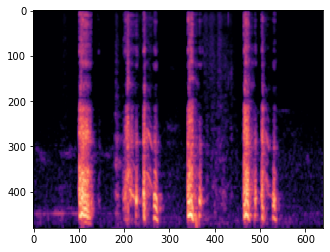

In [21]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('C:/Users/kirti/OneDrive/Desktop/New folder/trial removal negative/1fMS9159tNOgEbgTXBoUpBXQUIr1.png')
imgplot = plt.imshow(img)

In [22]:
if result[0][0] == 1:
    prediction = 'positive'
else:
    prediction = 'negative'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: negative


In [23]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:/Users/kirti/OneDrive/Desktop/New folder/trial removal negative/positive/0KSi2atlmsXNcGMfpDNzIjJSvC23.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(training_set.class_indices)

{'negative': 0, 'positive': 1}


In [24]:
if result[0][0] == 1:
    prediction = 'positive'
else:
    prediction = 'negative'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: negative


In [27]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('D:/Minor_Project/Mel Specter_Positive/Vaibhav Verma/p_Deep Breathing.wav.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(training_set.class_indices)

{'negative': 0, 'positive': 1}


In [28]:
if result[0][0] == 1:
    prediction = 'positive'
else:
    prediction = 'negative'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: positive


In [29]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:/Users/kirti/OneDrive/Desktop/Testing/mel/b7mMUQm5bObj1jwGFaNyaR07pt83/cough-heavy.wav.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(training_set.class_indices)

{'negative': 0, 'positive': 1}


In [30]:
if result[0][0] == 1:
    prediction = 'positive'
else:
    prediction = 'negative'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: positive


In [31]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('D:/Minor_Project/Mel Specter_Negative/Kaushalendra/n_Deep Breathing.wav.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(training_set.class_indices)

{'negative': 0, 'positive': 1}


In [32]:
if result[0][0] == 1:
    prediction = 'positive'
else:
    prediction = 'negative'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: positive
